In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [90]:
data = pd.read_csv('MNC_Salaries.csv')
data

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [91]:
#Lets check the null values without using visualization

data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

In [92]:
data['College'].value_counts

<bound method IndexOpsMixin.value_counts of 0                  Texas
1              Marquette
2      Boston University
3          Georgia State
4                    NaN
             ...        
452             Kentucky
453               Butler
454                  NaN
455                  NaN
456               Kansas
Name: College, Length: 457, dtype: object>

In [93]:
data['Salary'].value_counts

<bound method IndexOpsMixin.value_counts of 0      7730337.0
1      6796117.0
2            NaN
3      1148640.0
4      5000000.0
         ...    
452    2239800.0
453    2433333.0
454     900000.0
455    2900000.0
456     947276.0
Name: Salary, Length: 457, dtype: float64>

In [94]:
from scipy import stats
data['College'].mode()

0    Kentucky
dtype: object

In [95]:
data['Salary'].mode()

0    947276.0
dtype: float64

In [96]:
du = data['College'].unique()
du

array(['Texas', 'Marquette', 'Boston University', 'Georgia State', nan,
       'LSU', 'Gonzaga', 'Louisville', 'Oklahoma State', 'Ohio State',
       'Washington', 'Kentucky', 'North Carolina', 'Arizona',
       'Georgia Tech', 'Cincinnati', 'Miami (FL)', 'Stanford', 'Syracuse',
       'Saint Louis', 'Kansas', 'Georgetown', 'Texas A&M', 'UCLA', 'UNLV',
       'Wichita State', "Saint Joseph's", 'Notre Dame', 'Norfolk State',
       'Duke', 'Murray State', 'Tennessee State', 'Bowling Green',
       'Purdue', 'Wake Forest', 'Michigan', 'Missouri', 'USC',
       'Villanova', 'Rider', 'Utah', 'Belmont', 'Davidson', 'Vanderbilt',
       'Michigan State', 'Florida', 'Washington State', 'Arizona State',
       'Oklahoma', 'Wyoming', "St. John's", 'Maryland', 'Wisconsin',
       'Utah Valley', 'North Carolina State', 'UC Santa Barbara',
       'Baylor', 'Connecticut', 'Oregon State', 'New Mexico', 'Oregon',
       'Creighton', 'Arkansas', 'Memphis', "Saint Mary's", 'Tennessee',
       'Alabama'

In [97]:
data.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
Name        457 non-null object
Team        457 non-null object
Number      457 non-null int64
Position    457 non-null object
Age         457 non-null int64
DOJ         457 non-null object
Weight      457 non-null int64
College     373 non-null object
Salary      446 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [99]:
data

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [100]:
data['Name'].unique()

array(['Avery Bradley', 'Jae Crowder', 'John Holland', 'R.J. Hunter',
       'Jonas Jerebko', 'Amir Johnson', 'Jordan Mickey', 'Kelly Olynyk',
       'Terry Rozier', 'Marcus Smart', 'Jared Sullinger', 'Isaiah Thomas',
       'Evan Turner', 'James Young', 'Tyler Zeller', 'Bojan Bogdanovic',
       'Markel Brown', 'Wayne Ellington', 'Rondae Hollis-Jefferson',
       'Jarrett Jack', 'Sergey Karasev', 'Sean Kilpatrick',
       'Shane Larkin', 'Brook Lopez', 'Chris McCullough', 'Willie Reed',
       'Thomas Robinson', 'Henry Sims', 'Donald Sloan', 'Thaddeus Young',
       'Arron Afflalo', 'Lou Amundson', 'Thanasis Antetokounmpo',
       'Carmelo Anthony', 'Jose Calderon', 'Cleanthony Early',
       'Langston Galloway', 'Jerian Grant', 'Robin Lopez', "Kyle O'Quinn",
       'Kristaps Porzingis', 'Kevin Seraphin', 'Lance Thomas',
       'Sasha Vujacic', 'Derrick Williams', 'Tony Wroten', 'Elton Brand',
       'Isaiah Canaan', 'Robert Covington', 'Joel Embiid', 'Jerami Grant',
       'Richaun H

In [101]:
dteam = data['Team'].unique()
dteam

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [102]:
#Here at first we need to drop the Name Column Because all values are unique
data.drop(['Name'],axis=1,inplace=True)

In [103]:
data

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...
452,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [104]:
data['DOJ'].unique()

array(['06-Feb', '06-Jun', '06-May', '06-Oct', '06-Sep', '06-Aug', '7-0',
       '06-Apr', '05-Sep', '06-Jul', '06-Mar', '05-Nov', '06-Nov',
       '07-Mar', '6-0', '07-Feb', '06-Jan', '07-Jan'], dtype=object)

In [105]:
data.isnull().sum()

Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

In [106]:
data.fillna(data['College'].mode(),inplace=True)
data

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...
452,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [107]:
data["College"].fillna("No College", inplace = True) 

In [108]:
data

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Boston Celtics,8,PF,29,06-Oct,231,No College,5000000.0
...,...,...,...,...,...,...,...,...
452,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Utah Jazz,25,PG,24,06-Jan,179,No College,900000.0
455,Utah Jazz,21,C,26,07-Mar,256,No College,2900000.0


In [109]:
data.fillna(data['Salary'].median(),inplace=True)
data

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,Boston Celtics,30,SG,27,06-May,205,Boston University,2839073.0
3,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Boston Celtics,8,PF,29,06-Oct,231,No College,5000000.0
...,...,...,...,...,...,...,...,...
452,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Utah Jazz,25,PG,24,06-Jan,179,No College,900000.0
455,Utah Jazz,21,C,26,07-Mar,256,No College,2900000.0


In [110]:
# Agin Check the Null Values 
data.isnull().sum()

Team        0
Number      0
Position    0
Age         0
DOJ         0
Weight      0
College     0
Salary      0
dtype: int64

In [111]:
data['Team'].unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [112]:
data['Position'].unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [113]:
data

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,Boston Celtics,30,SG,27,06-May,205,Boston University,2839073.0
3,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Boston Celtics,8,PF,29,06-Oct,231,No College,5000000.0
...,...,...,...,...,...,...,...,...
452,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Utah Jazz,25,PG,24,06-Jan,179,No College,900000.0
455,Utah Jazz,21,C,26,07-Mar,256,No College,2900000.0


In [114]:
data[['College','Salary']].corr()

,Salary
Salary,1.0


In [115]:
# There is no connection between weight and salary so we are dropping this column
data.drop(['Weight'],axis=1,inplace=True)

In [116]:
data

,Team,Number,Position,Age,DOJ,College,Salary
0,Boston Celtics,0,PG,25,06-Feb,Texas,7730337.0
1,Boston Celtics,99,SF,25,06-Jun,Marquette,6796117.0
2,Boston Celtics,30,SG,27,06-May,Boston University,2839073.0
3,Boston Celtics,28,SG,22,06-May,Georgia State,1148640.0
4,Boston Celtics,8,PF,29,06-Oct,No College,5000000.0
...,...,...,...,...,...,...,...
452,Utah Jazz,41,PF,20,06-Oct,Kentucky,2239800.0
453,Utah Jazz,8,PG,26,06-Mar,Butler,2433333.0
454,Utah Jazz,25,PG,24,06-Jan,No College,900000.0
455,Utah Jazz,21,C,26,07-Mar,No College,2900000.0


In [117]:
data[['Number','Salary']].corr()

,Number,Salary
Number,1.000000,-0.111161
Salary,-0.111161,1.000000


In [118]:
data['Number'].unique()

array([ 0, 99, 30, 28,  8, 90, 55, 41, 12, 36,  7,  4, 11, 13, 44, 22, 21,
       24,  2, 10,  6,  1, 33, 14, 15, 17, 43,  3,  9, 42, 18, 23,  5, 39,
       31, 35, 20, 92, 54, 19, 40, 34, 45, 32, 25, 50, 37, 26, 16, 52, 27,
       77, 88], dtype=int64)

In [119]:
data['Team'].unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [120]:
data['Team'].mode()

0    New Orleans Pelicans
dtype: object

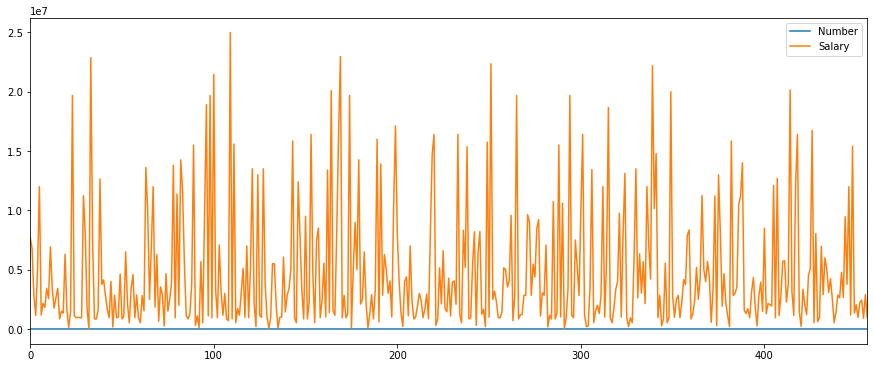

In [121]:
a = data[['Number','Salary']]
a.plot(figsize = (15,6));
plt.show()

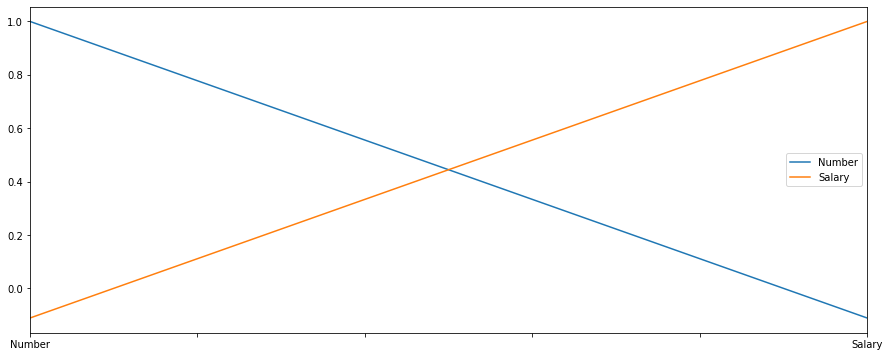

In [122]:
acorr = data[['Number','Salary']].corr()
acorr.plot(figsize = (15,6));
plt.show()

In [123]:
#Here we can drop the number column because there no correlation between Number and Salary so we are dropping this column
data.drop(['Number'],axis=1,inplace=True)

In [124]:
data

,Team,Position,Age,DOJ,College,Salary
0,Boston Celtics,PG,25,06-Feb,Texas,7730337.0
1,Boston Celtics,SF,25,06-Jun,Marquette,6796117.0
2,Boston Celtics,SG,27,06-May,Boston University,2839073.0
3,Boston Celtics,SG,22,06-May,Georgia State,1148640.0
4,Boston Celtics,PF,29,06-Oct,No College,5000000.0
...,...,...,...,...,...,...
452,Utah Jazz,PF,20,06-Oct,Kentucky,2239800.0
453,Utah Jazz,PG,26,06-Mar,Butler,2433333.0
454,Utah Jazz,PG,24,06-Jan,No College,900000.0
455,Utah Jazz,C,26,07-Mar,No College,2900000.0


In [125]:
data['College'].unique()

array(['Texas', 'Marquette', 'Boston University', 'Georgia State',
       'No College', 'LSU', 'Gonzaga', 'Louisville', 'Oklahoma State',
       'Ohio State', 'Washington', 'Kentucky', 'North Carolina',
       'Arizona', 'Georgia Tech', 'Cincinnati', 'Miami (FL)', 'Stanford',
       'Syracuse', 'Saint Louis', 'Kansas', 'Georgetown', 'Texas A&M',
       'UCLA', 'UNLV', 'Wichita State', "Saint Joseph's", 'Notre Dame',
       'Norfolk State', 'Duke', 'Murray State', 'Tennessee State',
       'Bowling Green', 'Purdue', 'Wake Forest', 'Michigan', 'Missouri',
       'USC', 'Villanova', 'Rider', 'Utah', 'Belmont', 'Davidson',
       'Vanderbilt', 'Michigan State', 'Florida', 'Washington State',
       'Arizona State', 'Oklahoma', 'Wyoming', "St. John's", 'Maryland',
       'Wisconsin', 'Utah Valley', 'North Carolina State',
       'UC Santa Barbara', 'Baylor', 'Connecticut', 'Oregon State',
       'New Mexico', 'Oregon', 'Creighton', 'Arkansas', 'Memphis',
       "Saint Mary's", 'Tennessee', 

In [126]:
data['College'].mode()

0    No College
dtype: object

In [127]:
# Here Mode is No college it means maximum datas are missing and more unique values so we are dropping this college column
data.drop(['College'],axis=1,inplace=True)

In [128]:
data

,Team,Position,Age,DOJ,Salary
0,Boston Celtics,PG,25,06-Feb,7730337.0
1,Boston Celtics,SF,25,06-Jun,6796117.0
2,Boston Celtics,SG,27,06-May,2839073.0
3,Boston Celtics,SG,22,06-May,1148640.0
4,Boston Celtics,PF,29,06-Oct,5000000.0
...,...,...,...,...,...
452,Utah Jazz,PF,20,06-Oct,2239800.0
453,Utah Jazz,PG,26,06-Mar,2433333.0
454,Utah Jazz,PG,24,06-Jan,900000.0
455,Utah Jazz,C,26,07-Mar,2900000.0


In [129]:
# Here we can see for a perticular Team the Salaries Varies a lot so there is no such correlation between Team and Salary, hence we are dropping this column
data.drop(['Team'],axis=1,inplace=True)

In [130]:
data

,Position,Age,DOJ,Salary
0,PG,25,06-Feb,7730337.0
1,SF,25,06-Jun,6796117.0
2,SG,27,06-May,2839073.0
3,SG,22,06-May,1148640.0
4,PF,29,06-Oct,5000000.0
...,...,...,...,...
452,PF,20,06-Oct,2239800.0
453,PG,26,06-Mar,2433333.0
454,PG,24,06-Jan,900000.0
455,C,26,07-Mar,2900000.0


In [131]:
# Also Here the DOJ Column because here no year is mentioned so here experience is not there
data.drop(['DOJ'],axis=1,inplace=True)

In [132]:
data

,Position,Age,Salary
0,PG,25,7730337.0
1,SF,25,6796117.0
2,SG,27,2839073.0
3,SG,22,1148640.0
4,PF,29,5000000.0
...,...,...,...
452,PF,20,2239800.0
453,PG,26,2433333.0
454,PG,24,900000.0
455,C,26,2900000.0


### Convert the Dataset to Numeric(boolean) Format

In [133]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [134]:
#For all those columns who has more than two 2 attributes!
data = pd.get_dummies(data)

In [135]:
data

,Age,Salary,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
0,25,7730337.0,0,0,1,0,0
1,25,6796117.0,0,0,0,1,0
2,27,2839073.0,0,0,0,0,1
3,22,1148640.0,0,0,0,0,1
4,29,5000000.0,0,1,0,0,0
...,...,...,...,...,...,...,...
452,20,2239800.0,0,1,0,0,0
453,26,2433333.0,0,0,1,0,0
454,24,900000.0,0,0,1,0,0
455,26,2900000.0,1,0,0,0,0


In [136]:
data.describe()

,Age,Salary,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
count,457.000000,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000
mean,26.938731,4.794457e+06,0.170678,0.218818,0.201313,0.185996,0.223195
std,4.404016,5.174920e+06,0.376640,0.413898,0.401421,0.389530,0.416844
min,19.000000,3.088800e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.100602e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.839073e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,6.331404e+06,0.000000,0.000000,0.000000,0.000000,0.000000
max,40.000000,2.500000e+07,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 7 columns):
Age            457 non-null int64
Salary         457 non-null float64
Position_C     457 non-null uint8
Position_PF    457 non-null uint8
Position_PG    457 non-null uint8
Position_SF    457 non-null uint8
Position_SG    457 non-null uint8
dtypes: float64(1), int64(1), uint8(5)
memory usage: 9.5 KB


In [138]:
#Lets again check the null values

data.isnull().sum()

Age            0
Salary         0
Position_C     0
Position_PF    0
Position_PG    0
Position_SF    0
Position_SG    0
dtype: int64

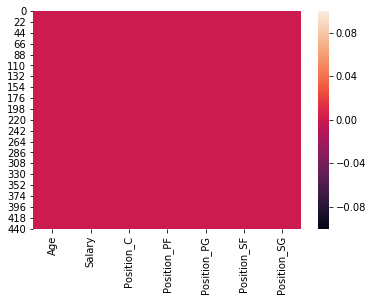

In [139]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [140]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(457, 7)
(451, 7)


In [141]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

Age            0.626349
Salary         1.613748
Position_C     1.756421
Position_PF    1.364672
Position_PG    1.494691
Position_SF    1.619310
Position_SG    1.333937
dtype: float64

In [142]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [143]:
#Lets Again Check the Skewness
data.skew()

Age            0.284946
Salary        -0.424757
Position_C     1.756421
Position_PF    1.364672
Position_PG    1.494691
Position_SF    1.619310
Position_SG    1.333937
dtype: float64

In [144]:
dfcor = data.corr()
dfcor

,Age,Salary,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
Age,1.000000,0.203894,0.050278,0.023628,-0.006386,-0.008614,-0.054691
Salary,0.203894,1.000000,0.100918,0.017050,0.030636,-0.043107,-0.097333
Position_C,0.050278,0.100918,1.000000,-0.240101,-0.227759,-0.216853,-0.243172
Position_PF,0.023628,0.017050,-0.240101,1.000000,-0.265713,-0.252990,-0.283695
Position_PG,-0.006386,0.030636,-0.227759,-0.265713,1.000000,-0.239986,-0.269112
Position_SF,-0.008614,-0.043107,-0.216853,-0.252990,-0.239986,1.000000,-0.256226
Position_SG,-0.054691,-0.097333,-0.243172,-0.283695,-0.269112,-0.256226,1.000000


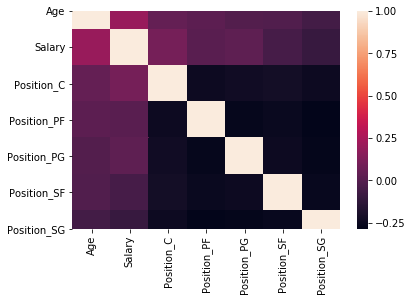

In [145]:
sns.heatmap(dfcor)

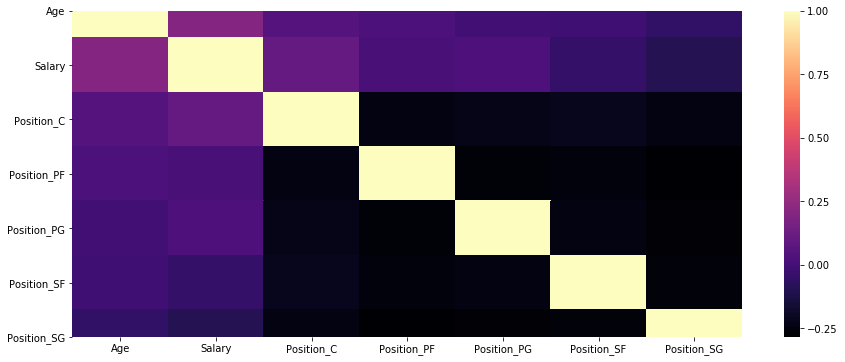

In [146]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='magma',annot=False)

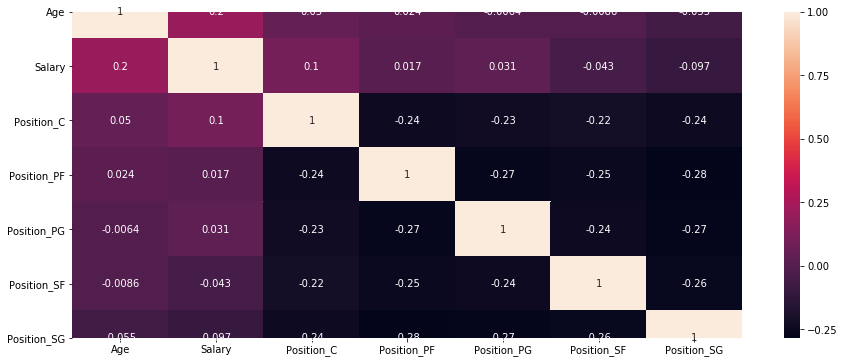

In [147]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,annot=True)

#### Plotting Pairplot through Iteration

### Plotting Boxplot through Iteration

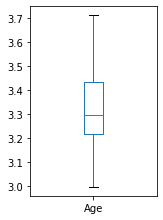

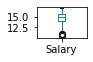

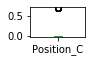

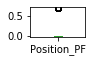

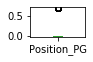

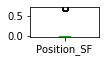

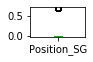

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### Plotting Displot Through Iteration

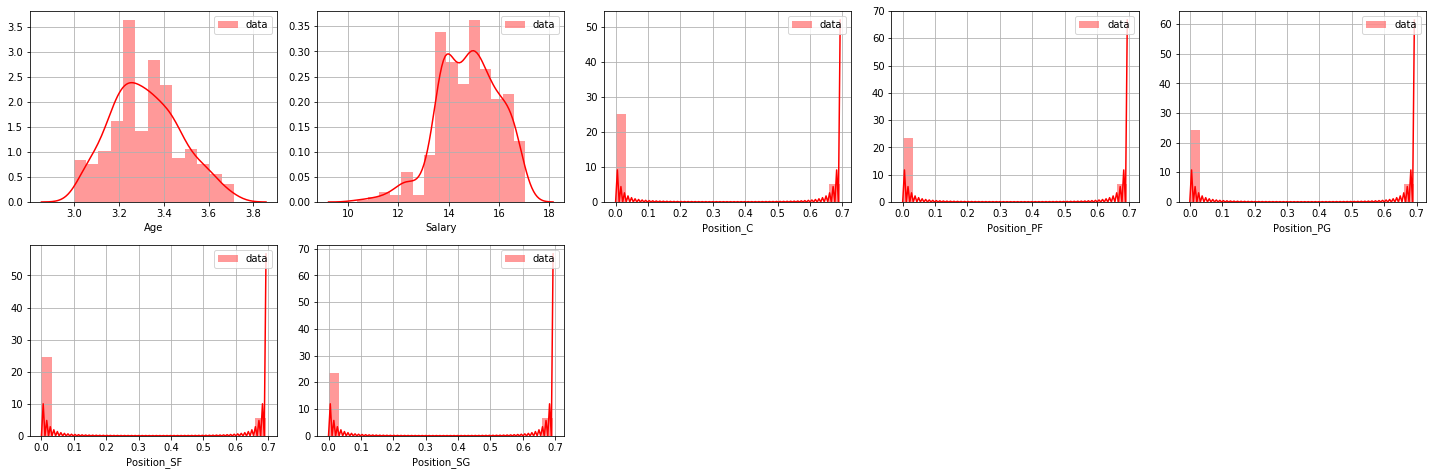

In [149]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

#### Separating X and Y variable

In [150]:
data

,Age,Salary,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
0,3.258097,15.860663,0.000000,0.000000,0.693359,0.000000,0.000000
1,3.258097,15.731862,0.000000,0.000000,0.000000,0.693359,0.000000
2,3.332205,14.858989,0.000000,0.000000,0.000000,0.000000,0.693359
3,3.135494,13.954090,0.000000,0.000000,0.000000,0.000000,0.693359
4,3.401197,15.424949,0.000000,0.693359,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
452,3.044522,14.621898,0.000000,0.693359,0.000000,0.000000,0.000000
453,3.295837,14.704773,0.000000,0.000000,0.693359,0.000000,0.000000
454,3.218876,13.710151,0.000000,0.000000,0.693359,0.000000,0.000000
455,3.295837,14.880222,0.693359,0.000000,0.000000,0.000000,0.000000


In [151]:
X = data.drop("Salary", axis=1)

In [152]:
X

,Age,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
0,3.258097,0.000000,0.000000,0.693359,0.000000,0.000000
1,3.258097,0.000000,0.000000,0.000000,0.693359,0.000000
2,3.332205,0.000000,0.000000,0.000000,0.000000,0.693359
3,3.135494,0.000000,0.000000,0.000000,0.000000,0.693359
4,3.401197,0.000000,0.693359,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
452,3.044522,0.000000,0.693359,0.000000,0.000000,0.000000
453,3.295837,0.000000,0.000000,0.693359,0.000000,0.000000
454,3.218876,0.000000,0.000000,0.693359,0.000000,0.000000
455,3.295837,0.693359,0.000000,0.000000,0.000000,0.000000


In [153]:
Y = data["Salary"]
Y

0      15.860663
1      15.731862
2      14.858989
3      13.954090
4      15.424949
         ...    
452    14.621898
453    14.704773
454    13.710151
455    14.880222
456    13.761347
Name: Salary, Length: 457, dtype: float64

In [154]:
X

,Age,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
0,3.258097,0.000000,0.000000,0.693359,0.000000,0.000000
1,3.258097,0.000000,0.000000,0.000000,0.693359,0.000000
2,3.332205,0.000000,0.000000,0.000000,0.000000,0.693359
3,3.135494,0.000000,0.000000,0.000000,0.000000,0.693359
4,3.401197,0.000000,0.693359,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
452,3.044522,0.000000,0.693359,0.000000,0.000000,0.000000
453,3.295837,0.000000,0.000000,0.693359,0.000000,0.000000
454,3.218876,0.000000,0.000000,0.693359,0.000000,0.000000
455,3.295837,0.693359,0.000000,0.000000,0.000000,0.000000


In [155]:
X.shape

(457, 6)

In [156]:
Y.shape

(457,)

In [157]:
Y = Y.values.reshape(-1,1)

In [158]:
Y

array([[15.86066315],
       [15.73186212],
       [14.8589885 ],
       [13.95409006],
       [15.42494867],
       [16.30041729],
       [13.97333534],
       [14.58800528],
       [14.41674035],
       [15.04837427],
       [14.75912887],
       [15.74889545],
       [15.04676122],
       [14.37503548],
       [14.77753001],
       [15.04676122],
       [13.64716291],
       [14.22097633],
       [14.10480208],
       [15.65606035],
       [14.28541481],
       [11.80720572],
       [14.22097633],
       [16.79557071],
       [13.9467502 ],
       [13.76134683],
       [13.79668343],
       [13.76134683],
       [13.76134683],
       [16.23462955],
       [15.89495222],
       [14.30744506],
       [10.33815541],
       [16.94555521],
       [15.81737062],
       [13.64716291],
       [13.64716291],
       [14.26808887],
       [16.35316785],
       [15.13726666],
       [15.23420459],
       [14.85011787],
       [14.30827994],
       [13.76134683],
       [15.20180517],
       [12

In [159]:
Y.shape

(457, 1)

In [160]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [161]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state
        
            

In [162]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is -0.09546061425596264
r2 score corresponding to  43 is -0.16119363279620336
r2 score corresponding to  44 is 0.0025474812219588028
r2 score corresponding to  45 is 0.009698443231118903
r2 score corresponding to  46 is 0.03126808483904997
r2 score corresponding to  47 is 0.01596644063202768
r2 score corresponding to  48 is -0.1084639428289047
r2 score corresponding to  49 is 0.0379995116377686
r2 score corresponding to  50 is 0.032900338856187705
r2 score corresponding to  51 is -0.030624084003105345
r2 score corresponding to  52 is 0.03843052243477296
r2 score corresponding to  53 is 0.07137875917903302
r2 score corresponding to  54 is -0.038068112077177085
r2 score corresponding to  55 is 0.04259287288164615
r2 score corresponding to  56 is 0.03536515381838057
r2 score corresponding to  57 is 0.08939235081822072
r2 score corresponding to  58 is 0.010337754347997441
r2 score corresponding to  59 is 0.07028338541243362
r2 score corresponding to  60 is 0.0

### Lets use grid_search to find optimal value of n_neighbors for KNN model

In [163]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_


{'n_neighbors': 26}

In [164]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=27)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is -0.0516746000019197
r2 score corresponding to  43 is -0.17230093992513185
r2 score corresponding to  44 is -0.029408640966771316
r2 score corresponding to  45 is -0.035225056275264954
r2 score corresponding to  46 is 0.02559834280071227
r2 score corresponding to  47 is 0.056630389916757284
r2 score corresponding to  48 is -0.05704304325731857
r2 score corresponding to  49 is 0.027368461671609334
r2 score corresponding to  50 is 0.004337377162427436
r2 score corresponding to  51 is 0.022008516325341065
r2 score corresponding to  52 is 0.006447053282644832
r2 score corresponding to  53 is 0.0662143248793522
r2 score corresponding to  54 is -0.048425833341273705
r2 score corresponding to  55 is 0.07332035942348214
r2 score corresponding to  56 is -0.032433473285349956
r2 score corresponding to  57 is 0.10566432203371456
r2 score corresponding to  58 is -0.01488919526634569
r2 score corresponding to  59 is 0.10456952677667763
r2 score corresponding to  60 i

In [165]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())


Mean r2 score for Linear Regression: 0.02589522086202023
Standard deviation in r2 scorefor Linear Regression: 0.05704409011680565

Mean r2 score for KNN Regression:  0.04029837422333817
Stadard deviation in r2 score for KNN Regression: 0.04719314916590947


In [166]:
#Lets check lasso regression and best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.001}

In [167]:
#Lets use cross val score with Lasso
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,X,Y,cv=5,scoring="r2").std())


Mean r2 score for Lasso Regression:  -0.005789285263562061
Standard deviation in r2 score for Lasso Regression:  0.006975038843725322


#### GradientBoostRegressor

In [168]:
# Fit regression model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
import warnings
warnings.filterwarnings("ignore")
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf1 = ensemble.GradientBoostingRegressor(**params)

clf1.fit(train_X, train_Y)
mse = mean_squared_error(test_Y, clf.predict(test_X))
print("MSE: %.4f" % mse)


MSE: 1.2267


In [169]:
#Lets check r2 score and standard deviation
print("Mean r2 score for Gradient Boost Regression: ",cross_val_score(clf1,X,Y,cv=5,scoring="r2").mean())

print("Standard deviation in r2 score for Gradient Boost Regression : ",cross_val_score(clf1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Gradient Boost Regression:  0.013839351030173263
Standard deviation in r2 score for Gradient Boost Regression :  0.09550200192459503


#### AdaBoostRegressor

In [170]:
#Now Lets use ada boost regression algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lreg,lsreg,DecisionTreeRegressor()]}
clf2 = GridSearchCV(ada_reg,parameters,cv=5)
clf2.fit(X,Y)
clf2.best_params_


{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 0.1,
 'n_estimators': 10}

In [171]:
add_reg=AdaBoostRegressor(base_estimator=lsreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.03369101575319491
Standard deviation in r2 score for ada boosting Regression:  0.06011937443394741


In [172]:
#Lets check maximum r2_score corresponding to this
r_state=maxr2_score(ada_reg,X,Y)

r2 score corresponding to  42 is -0.010315192965712594
r2 score corresponding to  43 is -0.08181106447433661
r2 score corresponding to  44 is 0.047075651047474465
r2 score corresponding to  45 is 0.034489122274851236
r2 score corresponding to  46 is 0.06823873099795985
r2 score corresponding to  47 is 0.03783660326549787
r2 score corresponding to  48 is 0.0602448595893883
r2 score corresponding to  49 is 0.07063011681011777
r2 score corresponding to  50 is -0.002326695157816916
r2 score corresponding to  51 is 0.042887910575159505
r2 score corresponding to  52 is 0.034635464501532987
r2 score corresponding to  53 is 0.09324639414619873
r2 score corresponding to  54 is -0.03378557060435328
r2 score corresponding to  55 is 0.13528521776457947
r2 score corresponding to  56 is -0.08542911688370514
r2 score corresponding to  57 is 0.03275802091457558
r2 score corresponding to  58 is 0.021695222840867334
r2 score corresponding to  59 is 0.040740082176254244
r2 score corresponding to  60 is 0

In [173]:
### We tried all the models and till now Addboost Regressor using Decision Tree Performs the Best
### random state corresponding to highest r2_score is 86

train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=86,test_size=0.20)
clf2.fit(train_X,train_Y)
y_pred=clf2.predict(test_X)

In [174]:
#Lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(test_Y,y_pred)))
print("r2_score is: ",r2_score(test_Y,y_pred))

RMSE is:  1.0988141986232498
r2_score is:  0.10385721942180515


#### Save the model

In [175]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(clf2,'mnc_salaries.pkl')

['mnc_salaries.pkl']